# Proyek Analisis Data: E Commerce Dataset
- **Nama:** Mochammad Revi Fikri Wardana
- **Email:** mrevifikri@gmai.com
- **ID Dicoding:** revi_fikri

## Menentukan Pertanyaan Bisnis

- Kapan rentang jumlah penjualan produk terbanyak?
- Wilayah mana yang sering melakukan pembelian?
- Apa kategori produk yang paling banyak terjual?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_d")

# ======================================================
# STEP 2: LOAD ESSENTIAL DATA
# ======================================================
# Load only the tables we need

orders = pd.read_csv('data/orders_dataset.csv')             # Timestamps order
order_items = pd.read_csv('data/order_items_dataset.csv')   # Product pada tiap order
products = pd.read_csv('data/products_dataset.csv')         # Product categories
customers = pd.read_csv('data/customers_dataset.csv')       # Customer data

**Insight:**

Di sini saya hanya memerlukan empat data tersebut untuk insight yang saya perlukan pada dataset ini
- Wilayah yang sering melakukan pembelian
- Monthly sales trend
- RFM analysis

### Assessing Data

In [4]:
# Melihat karakteristik data order
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [5]:
# Melihat kolom yang akan dipakai untuk memperoleh insight
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# Melihat kolom yang akan dipakai untuk memperoleh insight
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Melihat kolom yang akan dipakai untuk memperoleh insight
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# Melihat kolom yang akan dipakai untuk memperoleh insight
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Pada dataset orders, kolom order_purchase_date dapat digunakan untuk memperoleh insight penjualan produk

### Cleaning Data

In [9]:
# DATA PREPARATION
# ======================================================

# Create date features, untuk analisis sales tiap bulan
orders['order_purchase_date'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.date
orders['order_purchase_date']= pd.to_datetime(orders['order_purchase_date'])

## Exploratory Data Analysis (EDA)

### Explore....

In [10]:
# Merge
sales_data = orders.merge(order_items, on='order_id')
sales_data = sales_data.merge(products[['product_id', 'product_category_name']], on='product_id')
sales_data = sales_data.merge(customers[['customer_id', 'customer_unique_id', 'customer_state']], on='customer_id')

In [11]:
sales_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,SP


### Bivariate Analysis

In [20]:
# Menampilkan Jumlah Pembelian pada Bulan Tertentu
monthly_sales = sales_data.groupby(pd.Grouper(key='order_purchase_date', freq='M'))['price'].sum().reset_index()

C:\Users\mrevi\AppData\Local\Temp\ipykernel_6924\3410877146.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.groupby(pd.Grouper(key='order_purchase_date', freq='M'))['price'].sum().reset_index()


**Insights:**
- Mengelompokkan sales_data berdasarkan bulan menggunakan pd.Grouper(key = 'tanggal_pembelian_pesanan', freq = 'M')
- Menghitung jumlah harga untuk setiap bulan
- Pada kode dan grafik di atas menjelaskan tentang bivariate analysis, yaitu hubungan antara variabel waktu (order_purchase_date) pada sumbu x dan jumlah harga penjualan yaitu sum dari variabel price pada sumbu y

In [18]:
geo_sales = sales_data.groupby('customer_state')['price'].sum().sort_values(ascending=False)

**Insights:**
- Mengelompokkan sales_data berdasarkan customer_state
- Menghitung jumlah penjualan untuk setiap state
- Mengurutkan hasil untuk mengidentifikasi state dengan pembelian terbanyak
- Pada kode dan grafik di atas menjelaskan tentang bivariate analysis, yaitu hubungan antara variabel kategori (customer_state) pada sumbu x dan jumlah penjualan yaitu sum dari variabel price pada sumbu y

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan rentang jumlah penjualan produk terbanyak?

<module 'matplotlib.pyplot' from 'c:\\Users\\mrevi\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

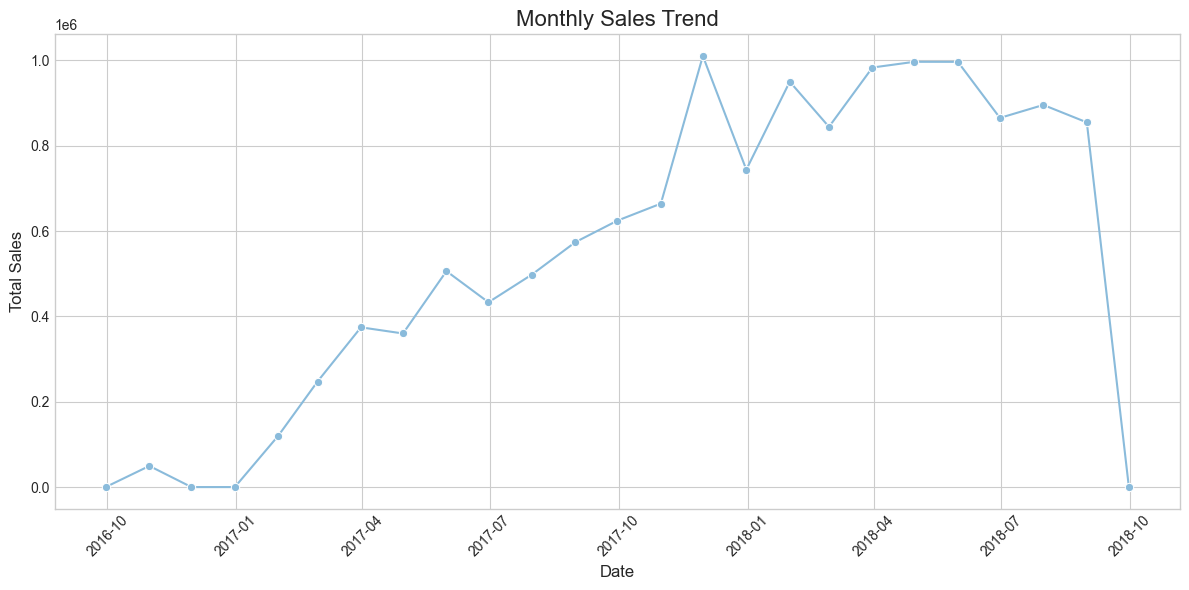

In [17]:
# Menampilkan Jumlah Pembelian pada Bulan Tertentu
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_purchase_date', y='price', data=monthly_sales, 
            marker='o', linestyle='-')
    
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
    
# Show the plot
plt

**Insight:**
- Visualisasi trend banyaknya pembelian pada periode tertentu, dengan pembelian terbanyak berada pada rentang November 2017 hingga Juli 2018  

### Pertanyaan 2: Wilayah mana yang sering melakukan pembelian?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SP'),
  Text(1, 0, 'RJ'),
  Text(2, 0, 'MG'),
  Text(3, 0, 'RS'),
  Text(4, 0, 'PR'),
  Text(5, 0, 'SC'),
  Text(6, 0, 'BA'),
  Text(7, 0, 'DF'),
  Text(8, 0, 'GO'),
  Text(9, 0, 'ES')])

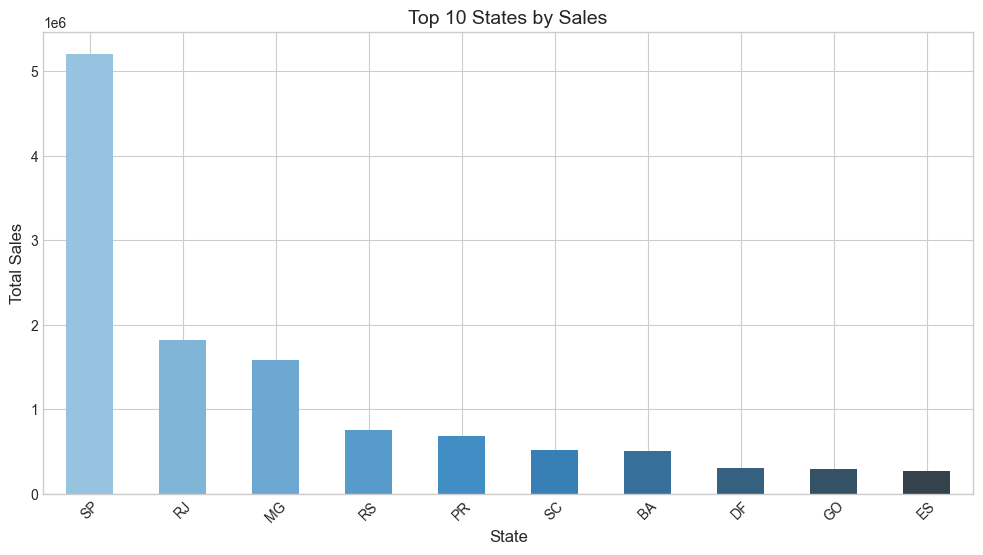

In [19]:
# Menampilkan State dengan Jumlah Pembelian Terbanyak 
colors = sns.color_palette("Blues_d", n_colors=10)

plt.figure(figsize=(12, 6))
geo_sales.head(10).plot(kind='bar', color=colors)
plt.title('Top 10 States by Sales', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)

**Insight**:
Dapat dilihat dari grafik di atas bahwa state dengan jumlah pembelian terbanyak, didominasi oleh Sao Paulo 

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  object        
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  object        
 6   order_delivered_customer_date  110196 non-null  object        
 7   order_estimated_delivery_date  112650 non-null  object        
 8   order_purchase_date            112650 non-null  datetime64[ns]
 9   order_item_id                  112650 non-null  int64         
 10  product_id                     112650 non-null  object        
 11  

### Pertanyaan 3: Apa kategori produk yang paling banyak terjual?

C:\Users\mrevi\AppData\Local\Temp\ipykernel_7208\260327635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_category_name', data=sales_data, palette='gist_earth',


Text(0.5, 1.0, 'Top 10 Products')

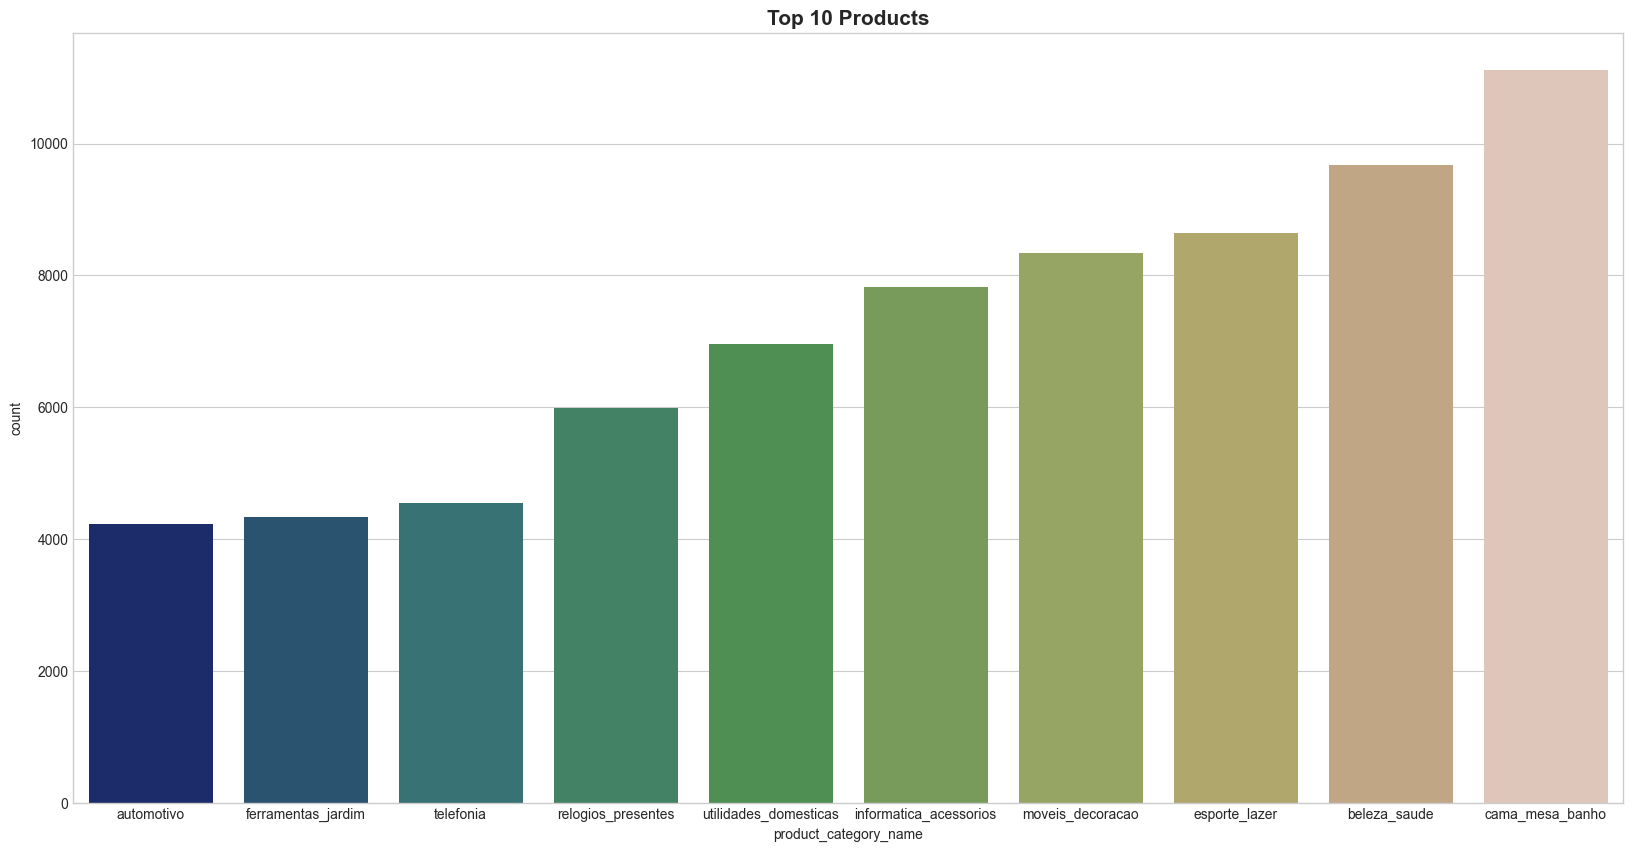

In [ ]:
# Menampilkan Jumlah Pembelian Produk Terbanyak Berdasarkan Kategori Tertentu

plt.figure(figsize=(20,10))
sns.countplot(x='product_category_name', data=sales_data, palette='gist_earth',
             order=sales_data['product_category_name'].value_counts()[:10]
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

In [ ]:
sales_data.groupby(by='product_category_name')['product_category_name'].count().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_category_name, dtype: int64

**Insight:**
Pembelian terbanyak berdasarkan kategori produk, yaitu produk cama_mesa_banho

### Pertanyaan 4 (RFM Analysis):
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [ ]:
# CUSTOMER SEGMENTATION (BASIC RFM)
# ======================================================
# Calculate key metrics per customer
customer_metrics = sales_data.groupby('customer_unique_id').agg({
    'order_id': 'nunique',                    # Number of orders (Frequency)
    'price': 'sum',                                   # Total spending (Monetary)
    'order_purchase_date': 'max'                      # Last purchase date (for Recency)
}).reset_index()

# Rename columns for clarity
customer_metrics.columns = ['customer_unique_id', 'frequency', 'monetary', 'last_purchase']

# Calculate recency (days since last purchase)
latest_date = sales_data['order_purchase_date'].max()
customer_metrics['recency'] = customer_metrics['last_purchase'].apply(lambda x: (latest_date - x).days)

customer_metrics.drop('last_purchase', axis=1, inplace=True)
customer_metrics.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119
2,0000f46a3911fa3c0805444483337064,1,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293


In [ ]:
customer_metrics['customer_unique_id'] = customer_metrics['customer_unique_id'].str[-8:]
customer_metrics.head()

,customer_unique_id,frequency,monetary,recency
0,df3221e2,1,129.90,116
1,4ca5be3f,1,18.90,119
2,83337064,1,69.00,542
3,16c9f078,1,25.99,326
4,70cf8255,1,180.00,293


C:\Users\mrevi\AppData\Local\Temp\ipykernel_7208\2800652246.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\mrevi\AppData\Local\Temp\ipykernel_7208\2800652246.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\mrevi\AppData\Local\Temp\ipykernel_7208\2800652246.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


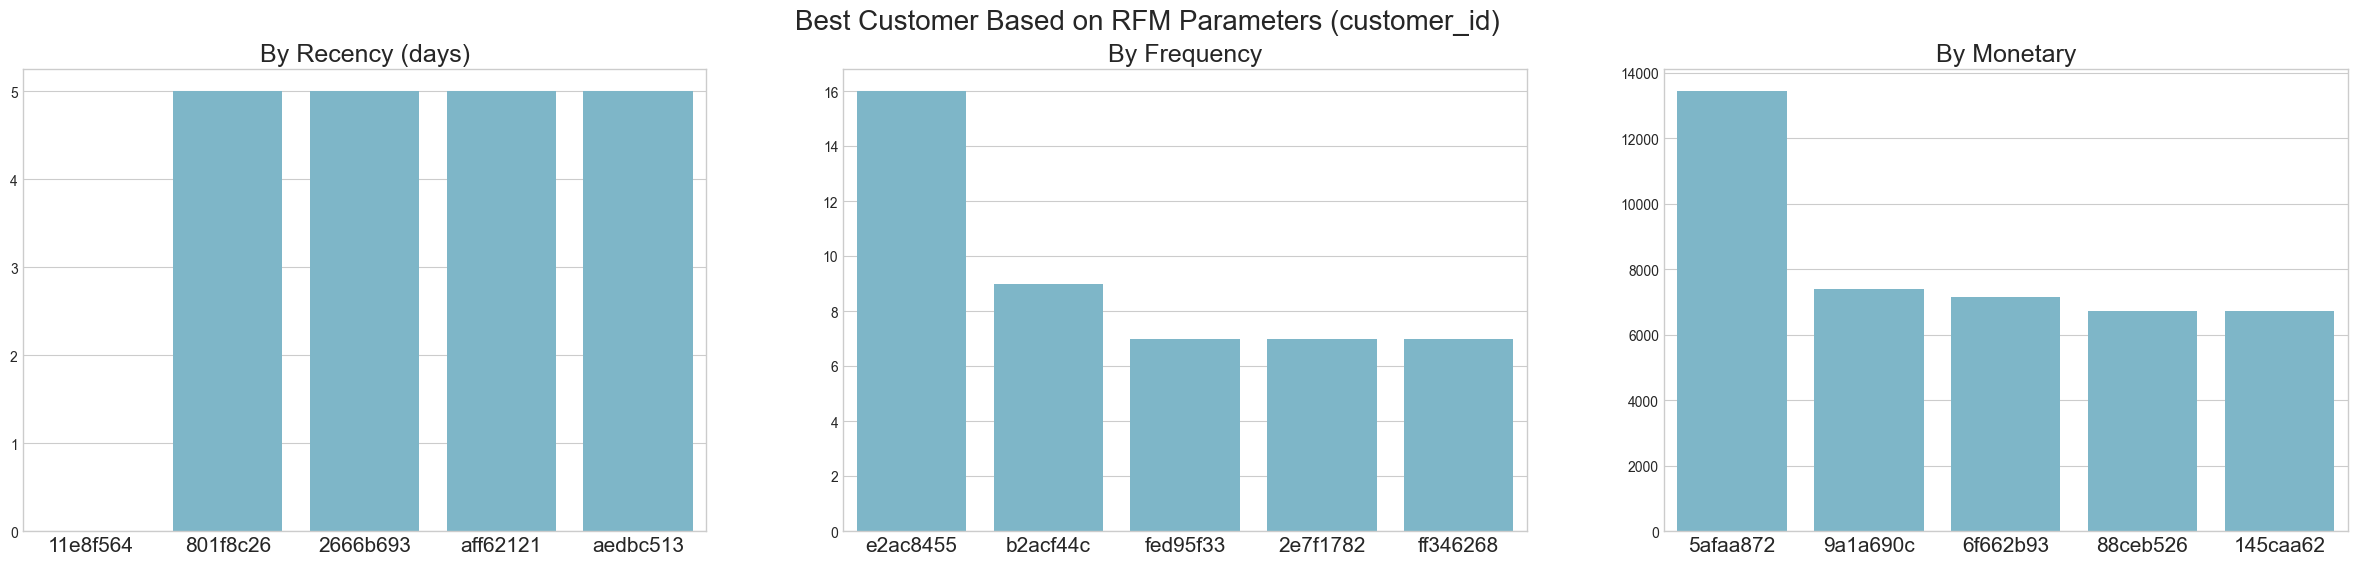

In [ ]:
# Set up the visualization with 3 subplots in one row
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Define consistent color scheme for bars
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# First chart (left): Top 5 customers by Recency (lowest days = best)
sns.barplot(
    y="recency",  # Vertical axis shows recency values 
    x="customer_unique_id",  # Horizontal axis shows customer IDs
    data=customer_metrics.sort_values(by="recency", ascending=True).head(5),  # Sort ascending because lower days = more recent
    palette=colors,
    ax=ax[0]  # Place in first subplot position
)
# Configure first chart appearance
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Second chart (middle): Top 5 customers by Frequency
sns.barplot(
    y="frequency",
    x="customer_unique_id",
    data=customer_metrics.sort_values(by="frequency", ascending=False).head(5),  # Descending because higher = better
    palette=colors,
    ax=ax[1]  # Place in second subplot position
)
# Configure second chart appearance
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Third chart (right): Top 5 customers by Monetary value
sns.barplot(
    y="monetary",
    x="customer_unique_id",
    data=customer_metrics.sort_values(by="monetary", ascending=False).head(5),  # Descending because higher = better
    palette=colors,
    ax=ax[2]  # Place in third subplot position
)
# Configure third chart appearance
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Add overall title for the entire figure
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)

# Display the figure
plt.show()

**Insight:**
- Recency mengacu pada seberapa baru customer melakukan pembelian, di mana user dengan id "11e8f564" melakukan pembelian terbaru daripada user lainnya
- Frequency mengacu pada seberapa sering customer melakukan pembelian, dengan user "e2ac8455" melakukan pembelian paling sering daripada user lainnya yaitu 16 kali 
- Monetary mengacu pada banyaknya uang customer keluarkan untuk pembelian, dengan user "5afaa872" melakukan pengeluaran terbanyak daripada user lain 

### Conclusion
- Pada visualisasi data trend pembelian, dapat dilihat bahwa pembelian terbanyak berada pada rentang November 2017 hingga Juli 2018
- Pada visualisasi kota, dapat dilihat bahwa state dengan jumlah pembelian terbanyak, didominasi oleh Sao Paulo
- Pada visualisasi kategori produk, pembelian terbanyak berupa produk cama_mesa_banho
- Recency mengacu pada seberapa baru customer melakukan pembelian, di mana user dengan id "11e8f564" melakukan pembelian terbaru daripada user lainnya
- Frequency mengacu pada seberapa sering customer melakukan pembelian, dengan user "e2ac8455" melakukan pembelian paling sering daripada user lainnya yaitu 16 kali 
- Monetary mengacu pada banyaknya uang customer keluarkan untuk pembelian, dengan user "5afaa872" melakukan pengeluaran terbanyak daripada user lain 

In [ ]:
sales_data.to_csv("main_data.csv", index=False)